In [1]:
from utils import train_agent, plot_rewards, evaluate_and_plot_transactions

Training Mode: MM: 100%|██████████| 100000/100000 [02:15<00:00, 737.41it/s, games_played=1e+5]


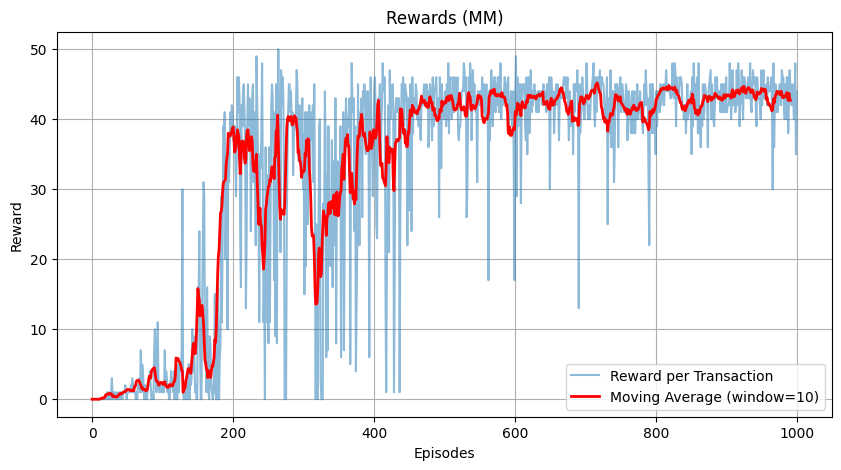

In [2]:
params = {
    'total_steps': 100000,
    'eval_intervals': 1000,
    'init_gen_power': 0.3,
    'init_con_price': 2,
    'min_power': 0.1,
    'max_power': 1,
    'min_price': 1.0,
    'max_price': 15,
    'threshold': -0.3,
    'gen_actions': [-0.1, 0.0, 0.1],
    'con_actions': [-1, 0, 1],
    'a': 0.1,
    'b': 2,
    'c': 0
}

agent_G, agent_C, reward_history, profit_history = train_agent(mode='MM', kwargs=params)


Generator 10 last mean 0.5999999999999999
Consummer 10 last mean 13.2


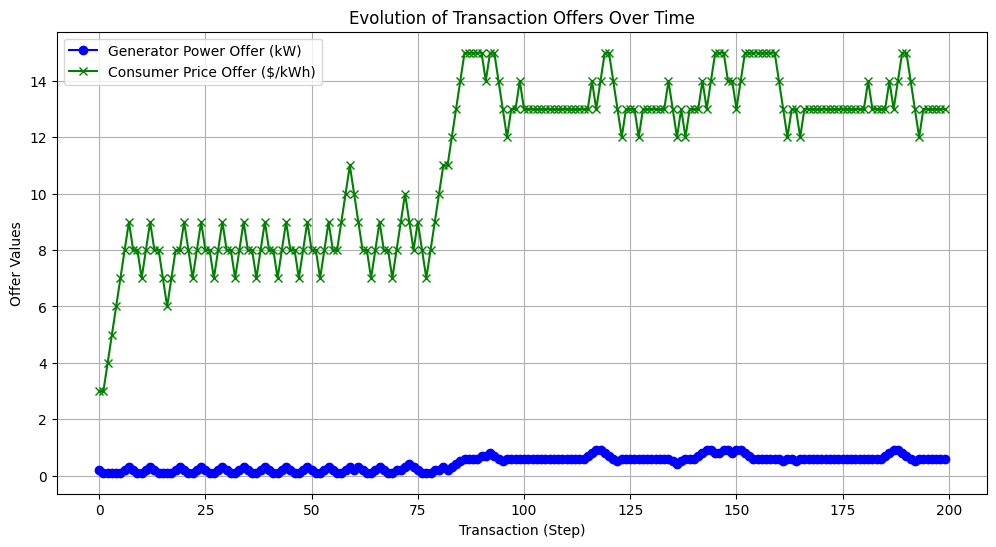

In [60]:
eval_params = params.copy()
eval_params.update({
    'init_gen_power': 0.3,
    'init_con_price': 2,
    'threshold': 1,
    'total_steps': 200
})

evaluate_and_plot_transactions(agent_G, agent_C, eval_params, evaluate_param=False)

In [4]:
import numpy as np
from scipy.optimize import minimize, minimize_scalar

# Define the function
def f(vars):
    x, y = vars
    return - x*1/np.log(1+y) - ( 0.1 * x**2 + 2 * x) 

# Bounds (choose a reasonable domain for x and y)
bounds = [(params['min_power'], params['max_power']), (params['min_price'], params['max_price'])]

# Minimize
res_min = minimize(f, x0=(0, 0), bounds=bounds)

# To find max, minimize the negative of f
res_max = minimize(lambda vars: -f(vars), x0=(0, 0), bounds=bounds)

print("Minimum:")
print(f"Point: {res_min.x}, Value: {res_min.fun}")

print("\nMaximum:")
print(f"Point: {res_max.x}, Value: {-res_max.fun}")


Minimum:
Point: [1. 1.], Value: -3.5426950408889635

Maximum:
Point: [ 0.1 15. ], Value: -0.2370673760222241


In [5]:
from minimax_agent import MinimaxQAgent

GENERATOR_ACTIONS = [-0.1, 0.0, 0.1]  # Power adjustments
CONSUMER_ACTIONS = [-1, 0, 1]          # Price adjustments

agent = MinimaxQAgent('Prueba', GENERATOR_ACTIONS)

agent.solve_minimax_policy((5, 2))



array([0., 0., 1.])

In [6]:
from energy_market_env import EnergyMarketEnv

env1 = EnergyMarketEnv(init_gen_power=0.2, init_con_price=2, threshold=1)

actions_dict = {'generator': 0, 'consumer': 0}

next_state, reward, done = env1.step(actions_dict)
print(reward)

{'generator': 0.0, 'consumer': 0.0}
